<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.797392,67.482029,37.268161,33.856564,-0.073392,169.330755,169.412600,-0.081845
1,0.0,1.0,59.509339,27.480307,76.833155,67.480009,0.122672,241.425481,241.296286,0.129195
2,0.0,2.0,86.238106,98.478170,22.961889,81.681520,0.085414,299.445100,299.362875,0.082225
3,0.0,3.0,49.367431,42.488097,82.838932,30.242623,-0.060419,214.876664,214.938971,-0.062307
4,0.0,4.0,62.916773,35.844011,23.590221,54.579555,-0.144953,186.785608,186.922423,-0.136816
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.527444,63.325129,32.675267,83.008633,-0.151564,231.384909,231.547822,-0.162913
249996,999.0,246.0,28.468882,31.532664,94.645414,47.165690,0.053276,211.865926,211.843366,0.022560
249997,999.0,247.0,37.348660,53.051144,22.176211,98.666991,0.135328,221.378334,221.260901,0.117433
249998,999.0,248.0,63.800973,45.576877,40.068127,90.060612,0.034973,249.541562,249.512909,0.028653


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.797392  67.482029  37.268161  33.856564 -0.073392  169.330755   
      1.0    59.509339  27.480307  76.833155  67.480009  0.122672  241.425481   
      2.0    86.238106  98.478170  22.961889  81.681520  0.085414  299.445100   
      3.0    49.367431  42.488097  82.838932  30.242623 -0.060419  214.876664   
      4.0    62.916773  35.844011  23.590221  54.579555 -0.144953  186.785608   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.527444  63.325129  32.675267  83.008633 -0.151564  231.384909   
      246.0  28.468882  31.532664  94.645414  47.165690  0.053276  211.865926   
      247.0  37.348660  53.051144  22.176211  98.666991  0.135328  221.378334   
      248.0  63.800973  45.576877  40.068127  90.060612  0.034973  249.541562   
      249.0  70.408869  88.940062  94.877844  39.283097 -0.021394  303.488478   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.412600 -0.081845  
      1.0    241.296286  0.129195  
      2.0    299.362875  0.082225  
      3.0    214.938971 -0.062307  
      4.0    186.922423 -0.136816  
...                 ...       ...  
999.0 245.0  231.547822 -0.162913  
      246.0  211.843366  0.022560  
      247.0  221.260901  0.117433  
      248.0  249.512909  0.028653  
      249.0  303.505496 -0.017017  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.797392  67.482029  37.268161  33.856564 -0.073392  169.330755   
      1.0    59.509339  27.480307  76.833155  67.480009  0.122672  241.425481   
      2.0    86.238106  98.478170  22.961889  81.681520  0.085414  299.445100   
      3.0    49.367431  42.488097  82.838932  30.242623 -0.060419  214.876664   
      4.0    62.916773  35.844011  23.590221  54.579555 -0.144953  186.785608   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.527444  63.325129  32.675267  83.008633 -0.151564  231.384909   
      246.0  28.468882  31.532664  94.645414  47.165690  0.053276  211.865926   
      247.0  37.348660  53.051144  22.176211  98.666991  0.135328  221.378334   
      248.0  63.800973  45.576877  40.068127  90.060612  0.034973  249.541562   
      249.0  70.408869  88.940062  94.877844  39.283097 -0.021394  303.488478   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.412600 -0.081845  
      1.0    241.296286  0.129195  
      2.0    299.362875  0.082225  
      3.0    214.938971 -0.062307  
      4.0    186.922423 -0.136816  
...                 ...       ...  
999.0 245.0  231.547822 -0.162913  
      246.0  211.843366  0.022560  
      247.0  221.260901  0.117433  
      248.0  249.512909  0.028653  
      249.0  303.505496 -0.017017  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.797392,67.482029,37.268161,33.856564,-0.073392,169.330755,169.412600,-0.081845
1,0.0,1.0,59.509339,27.480307,76.833155,67.480009,0.122672,241.425481,241.296286,0.129195
2,0.0,2.0,86.238106,98.478170,22.961889,81.681520,0.085414,299.445100,299.362875,0.082225
3,0.0,3.0,49.367431,42.488097,82.838932,30.242623,-0.060419,214.876664,214.938971,-0.062307
4,0.0,4.0,62.916773,35.844011,23.590221,54.579555,-0.144953,186.785608,186.922423,-0.136816
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.527444,63.325129,32.675267,83.008633,-0.151564,231.384909,231.547822,-0.162913
249996,999.0,246.0,28.468882,31.532664,94.645414,47.165690,0.053276,211.865926,211.843366,0.022560
249997,999.0,247.0,37.348660,53.051144,22.176211,98.666991,0.135328,221.378334,221.260901,0.117433
249998,999.0,248.0,63.800973,45.576877,40.068127,90.060612,0.034973,249.541562,249.512909,0.028653


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.797392  67.482029  37.268161  33.856564 -0.073392  169.330755   
      1.0    59.509339  27.480307  76.833155  67.480009  0.122672  241.425481   
      2.0    86.238106  98.478170  22.961889  81.681520  0.085414  299.445100   
      3.0    49.367431  42.488097  82.838932  30.242623 -0.060419  214.876664   
      4.0    62.916773  35.844011  23.590221  54.579555 -0.144953  186.785608   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.527444  63.325129  32.675267  83.008633 -0.151564  231.384909   
      246.0  28.468882  31.532664  94.645414  47.165690  0.053276  211.865926   
      247.0  37.348660  53.051144  22.176211  98.666991  0.135328  221.378334   
      248.0  63.800973  45.576877  40.068127  90.060612  0.034973  249.541562   
      249.0  70.408869  88.940062  94.877844  39.283097 -0.021394  303.488478   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.412600 -0.081845  
      1.0    241.296286  0.129195  
      2.0    299.362875  0.082225  
      3.0    214.938971 -0.062307  
      4.0    186.922423 -0.136816  
...                 ...       ...  
999.0 245.0  231.547822 -0.162913  
      246.0  211.843366  0.022560  
      247.0  221.260901  0.117433  
      248.0  249.512909  0.028653  
      249.0  303.505496 -0.017017  

[250000 rows x 8 columns]

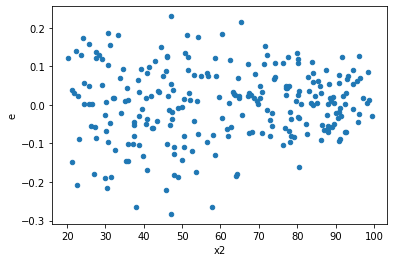

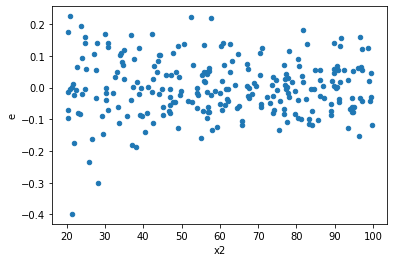

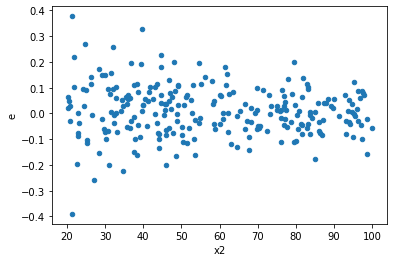

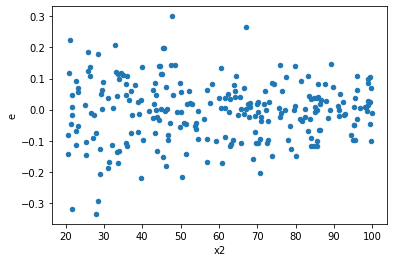

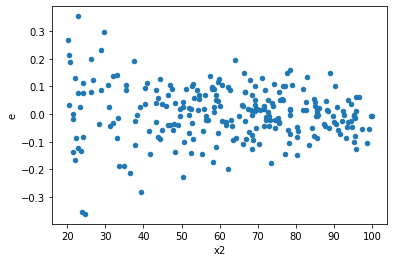

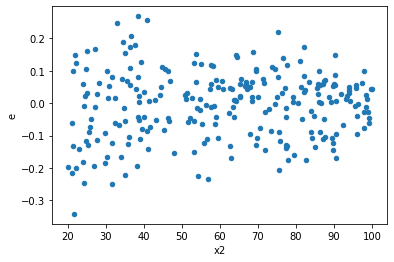

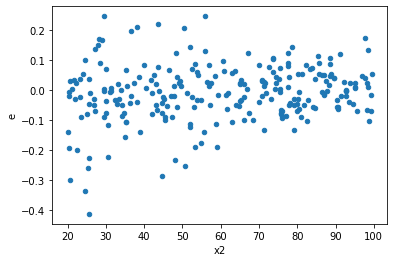

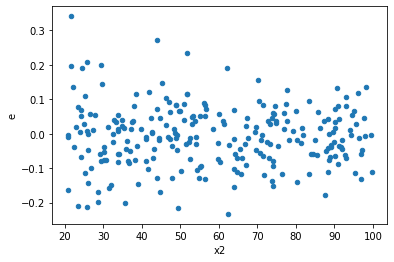

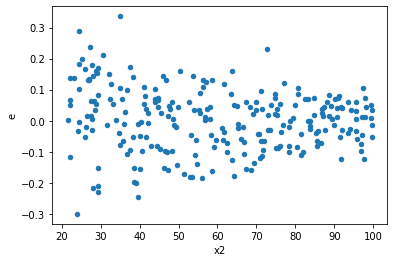

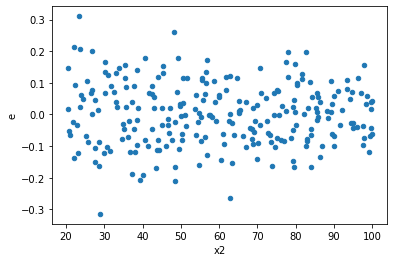

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,120.0,122.0,1.0015619216040086,1.1340976596755878,0.00834634934670007,0.009295882456357277,1.1137662791496532,0.5539755593675793,0.7230122203162104,0.2769877796837896,Reject001=1 : Homoscedasticity
1.0,124.0,118.0,0.7746332528049045,1.2400708934801645,0.006247042361329874,0.01050907536847597,1.6822481360985666,0.004645476486714095,0.997677261756643,0.0023227382433570476,Reject001=0 : Heteroscedasticity
2.0,131.0,111.0,1.242873047611721,1.078829737486123,0.009487580516120007,0.009719186824199307,1.0244115249073025,0.8990624328095349,0.5504687835952325,0.44953121640476745,Reject001=1 : Homoscedasticity
4.0,127.0,115.0,0.8150400001098725,1.4317442778233556,0.006417637796140728,0.012449950241942223,1.9399583830407272,0.0003459135505645694,0.9998270432247177,0.0001729567752822847,Reject001=0 : Heteroscedasticity
6.0,125.0,117.0,1.0189847536744407,1.1392318343510095,0.008151878029395525,0.009737024225222303,1.1944516576561583,0.3314818465134852,0.8342590767432574,0.1657409232567426,Reject001=1 : Homoscedasticity
8.0,120.0,122.0,0.8946239924733609,1.509669636461102,0.007455199937278007,0.01237434128246805,1.6598268841313042,0.005625524686893035,0.9971872376565535,0.0028127623434465177,Reject001=0 : Heteroscedasticity
10.0,134.0,108.0,1.04084450708483,1.2110169582689831,0.007767496321528582,0.011213119983972066,1.4435951456962406,0.04788415392501455,0.9760579230374927,0.023942076962507275,Reject001=1 : Homoscedasticity
11.0,117.0,125.0,0.5438521377281476,1.3054374330997522,0.004648308869471347,0.010443499464798018,2.246730963466668,1.0671108638060645e-05,0.999994664445681,5.335554319030322e-06,Reject001=0 : Heteroscedasticity
12.0,98.0,144.0,0.5134232005550792,1.1725351845307517,0.005239012250562032,0.00814260544813022,1.5542253117000622,0.01587033682128891,0.9920648315893555,0.007935168410644455,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,122.0,1.0015619216040086,1.1340976596755878,0.00834634934670007,0.009295882456357277,1.1137662791496532,0.5539755593675793,Reject001=1 : Homoscedasticity
1.0,124.0,118.0,0.7746332528049045,1.2400708934801645,0.006247042361329874,0.01050907536847597,1.6822481360985666,0.004645476486714095,Reject001=0 : Heteroscedasticity
2.0,131.0,111.0,1.242873047611721,1.078829737486123,0.009487580516120007,0.009719186824199307,1.0244115249073025,0.8990624328095349,Reject001=1 : Homoscedasticity
3.0,117.0,125.0,1.2802595319892691,1.0100919158646886,0.010942389162301445,0.008080735326917509,0.7384799797431019,0.09790042230232403,Reject001=1 : Homoscedasticity
4.0,127.0,115.0,0.8150400001098725,1.4317442778233556,0.006417637796140728,0.012449950241942223,1.9399583830407272,0.0003459135505645694,Reject001=0 : Heteroscedasticity
5.0,119.0,123.0,1.3407305059853676,1.2661870741960004,0.011266642907440064,0.010294203855252036,0.9136886595078054,0.6211951024241232,Reject001=1 : Homoscedasticity
6.0,125.0,117.0,1.0189847536744407,1.1392318343510095,0.008151878029395525,0.009737024225222303,1.1944516576561583,0.3314818465134852,Reject001=1 : Homoscedasticity
7.0,119.0,123.0,1.039911920719508,0.8247167078113269,0.008738755636298386,0.006705013884644934,0.7672733011087015,0.14715833604574768,Reject001=1 : Homoscedasticity
8.0,120.0,122.0,0.8946239924733609,1.509669636461102,0.007455199937278007,0.01237434128246805,1.6598268841313042,0.005625524686893035,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      678
Reject001=0 : Heteroscedasticity    322
Name: Result_test, dtype: int64